# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [116]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 


Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

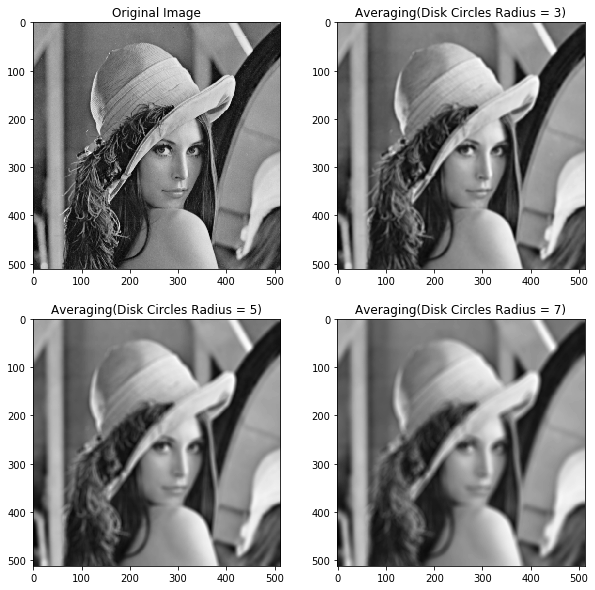

In [117]:
#Impoprt
from skimage.morphology import disk
from skimage.filters.rank import mean

#Input
lena_img = io.imread('./images/lena-grey.bmp')

#Mean Filter using different disk circles
Rad3_Avg = mean(lena_img, disk(3))
Rad5_Avg = mean(lena_img, disk(5))
Rad7_Avg = mean(lena_img, disk(7))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),plt.imshow(lena_img, cmap=cm.gray),plt.title('Original Image')
plt.subplot(222),plt.imshow(Rad3_Avg , cmap=cm.gray),plt.title('Averaging(Disk Circles Radius = 3)')
plt.subplot(223),plt.imshow(Rad5_Avg , cmap=cm.gray),plt.title('Averaging(Disk Circles Radius = 5)')
plt.subplot(224),plt.imshow(Rad7_Avg , cmap=cm.gray),plt.title('Averaging(Disk Circles Radius = 7)')

plt.show()


### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

(<matplotlib.axes._subplots.AxesSubplot at 0x27315b1bb00>,
 Text(0.5,1,'Image after Convolution Filtering'))

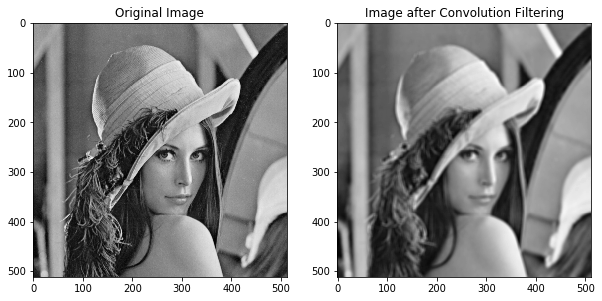

In [118]:
#Import
from scipy import ndimage

#Defining the Mask
mask = np.ones((7,7),np.float32)

mask /= np.sum(np.sum(mask))

# Filtering using convolution
mean = ndimage.filters.convolve(lena_img,mask)

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(121),plt.imshow(lena_img, cmap=cm.gray),plt.title('Original Image')
plt.subplot(122),plt.imshow(mean , cmap=cm.gray),plt.title('Image after Convolution Filtering')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [119]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

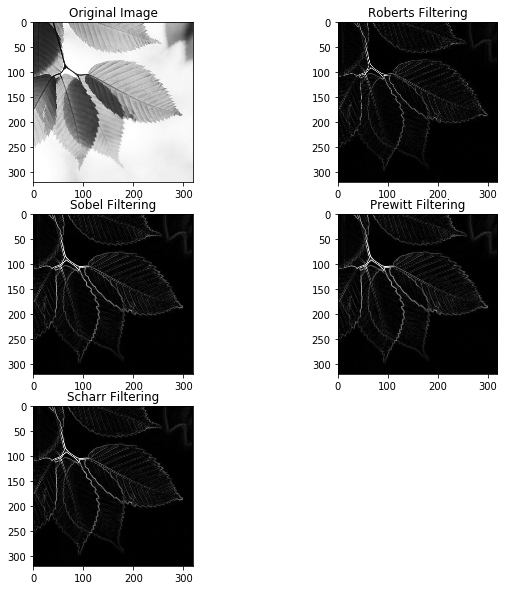

In [120]:
leaves_img = io.imread('./images/leaves.jpg', as_grey=True)
        
filt_roberts = filters.roberts(leaves_img)
filt_sobel = filters.sobel(leaves_img)
filt_prewitt = filters.prewitt(leaves_img)
filt_scharr = filters.scharr(leaves_img)

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(321),plt.imshow(leaves_img, cmap=cm.gray),plt.title('Original Image')
plt.subplot(322),plt.imshow(filt_roberts , cmap=cm.gray),plt.title('Roberts Filtering')
plt.subplot(323),plt.imshow(filt_sobel , cmap=cm.gray),plt.title('Sobel Filtering')
plt.subplot(324),plt.imshow(filt_prewitt , cmap=cm.gray),plt.title('Prewitt Filtering')
plt.subplot(325),plt.imshow(filt_scharr , cmap=cm.gray),plt.title('Scharr Filtering')


plt.show()
  

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

(<matplotlib.axes._subplots.AxesSubplot at 0x27319eef4e0>,
 Text(0.5,1,'Angle after Sobel filtering'))

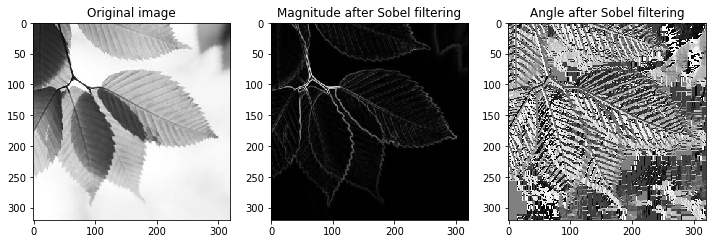

In [121]:
# Define the sobel filters
Sx = [[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]]
Sx = (1./4.)*np.array(Sx)
Sy = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]
Sy = (1./4.)*np.array(Sy)

# Filtering using convolution
leaves_Sx = ndimage.filters.convolve(leaves_img, Sx)
leaves_Sy = ndimage.filters.convolve(leaves_img, Sy)

# Magnitude and Angle of Filter Image
leaves_mag = np.sqrt(leaves_Sx**2. + leaves_Sy**2.)
leaves_ang = np.arctan2(leaves_Sy,leaves_Sx)

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (131), io.imshow(leaves_img), plt.title('Original image')
plt.subplot (132), io.imshow(leaves_mag, cmap='gray'), plt.title ('Magnitude after Sobel filtering')
plt.subplot (133), plt.imshow(leaves_ang, cmap='gray'), plt.title ('Angle after Sobel filtering')



### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

(<matplotlib.axes._subplots.AxesSubplot at 0x2730de3e710>,
 Text(0.5,1,'Filtered image using Laplace'))

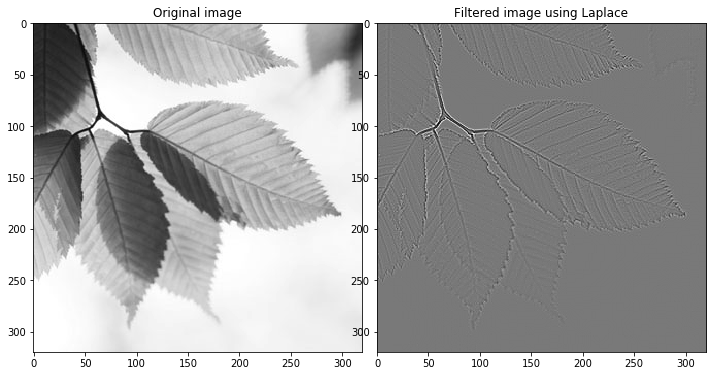

In [122]:
# Laplacian filter
leaves_laplace = filters.laplace(leaves_img)

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (121), io.imshow(leaves_img), plt.title('Original image')
plt.subplot (122), plt.imshow(leaves_laplace, cmap='gray'), plt.title ('Filtered image using Laplace')


### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

(<matplotlib.axes._subplots.AxesSubplot at 0x2731a021ba8>,
 Text(0.5,1,'Filtered image using Laplace, f=0.5'))

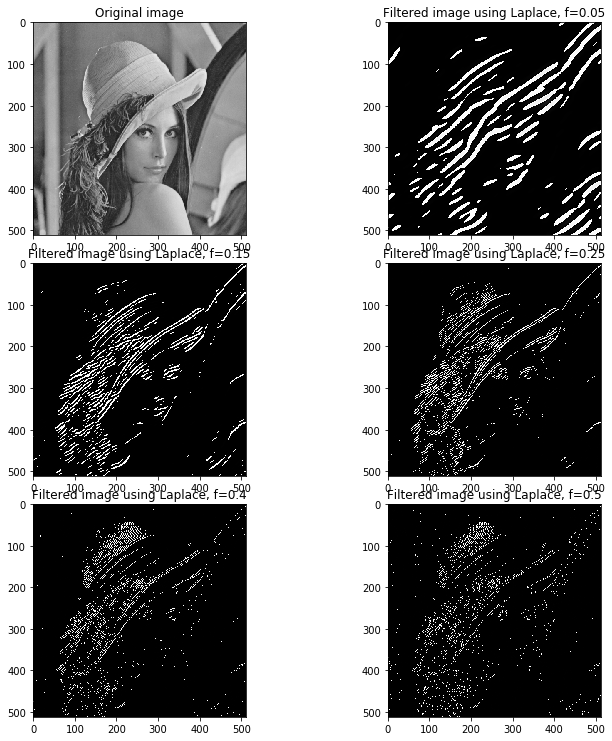

In [123]:
#Input

# Gabor filtering for ⁡θ=60 and different frequencies
lena_laplace_real_f1, lena_laplace_im= filters.gabor(lena_img, 0.05, 1.0472)
lena_laplace_real_f2, lena_laplace_im = filters.gabor(lena_img, 0.15, 1.0472)
lena_laplace_real_f3, lena_laplace_im = filters.gabor(lena_img, 0.25, 1.0472)
lena_laplace_real_f4, lena_laplace_im = filters.gabor(lena_img, 0.4, 1.0472)
lena_laplace_real_f5, lena_laplace_im = filters.gabor(lena_img, 0.5, 1.0472)

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (321), io.imshow(lena_img), plt.title('Original image')
plt.subplot (322), plt.imshow(lena_laplace_real_f1, cmap='gray'), plt.title ('Filtered image using Laplace, f=0.05')
plt.subplot (323), plt.imshow(lena_laplace_real_f2, cmap='gray'), plt.title ('Filtered image using Laplace, f=0.15')
plt.subplot (324), plt.imshow(lena_laplace_real_f3, cmap='gray'), plt.title ('Filtered image using Laplace, f=0.25')
plt.subplot (325), plt.imshow(lena_laplace_real_f4, cmap='gray'), plt.title ('Filtered image using Laplace, f=0.4')
plt.subplot (326), plt.imshow(lena_laplace_real_f5, cmap='gray'), plt.title ('Filtered image using Laplace, f=0.5')

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [124]:
from skimage import util

(<matplotlib.axes._subplots.AxesSubplot at 0x2731c7b1978>,
 Text(0.5,1,'Image with Speckle noise'))

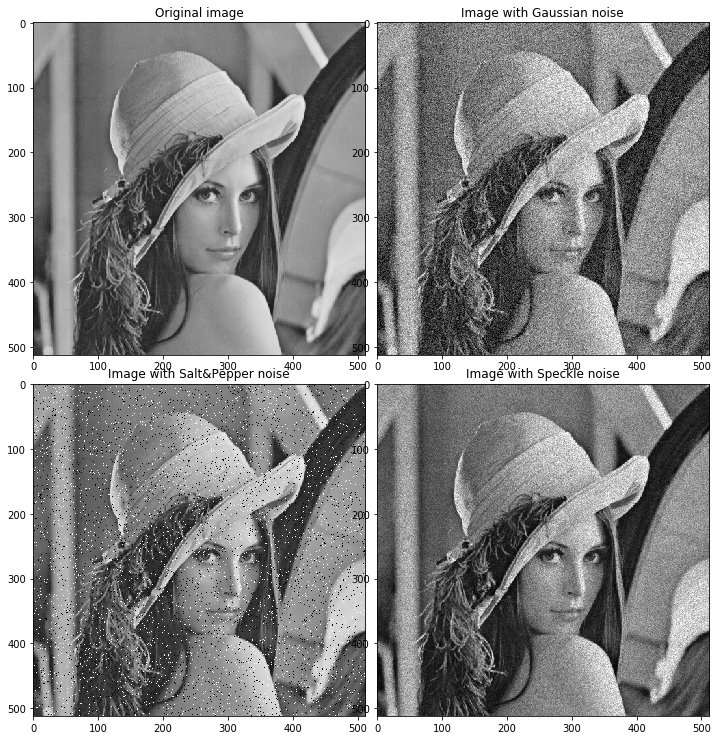

In [125]:
# Generation of Noisy images
lena_gaussian = util.random_noise(lena_img, 'gaussian')
lena_saltnpepper = util.random_noise(lena_img, 's&p') 
lena_speckle = util.random_noise(lena_img, 'speckle')

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (221), io.imshow(lena_img), plt.title('Original image')
plt.subplot (222), plt.imshow(lena_gaussian, cmap='gray'), plt.title ('Image with Gaussian noise')
plt.subplot (223), plt.imshow(lena_saltnpepper, cmap='gray'), plt.title ('Image with Salt&Pepper noise')
plt.subplot (224), plt.imshow(lena_speckle, cmap='gray'), plt.title ('Image with Speckle noise')

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x2731c60bcf8>,
 Text(0.5,1,'Denoised Splecke'))

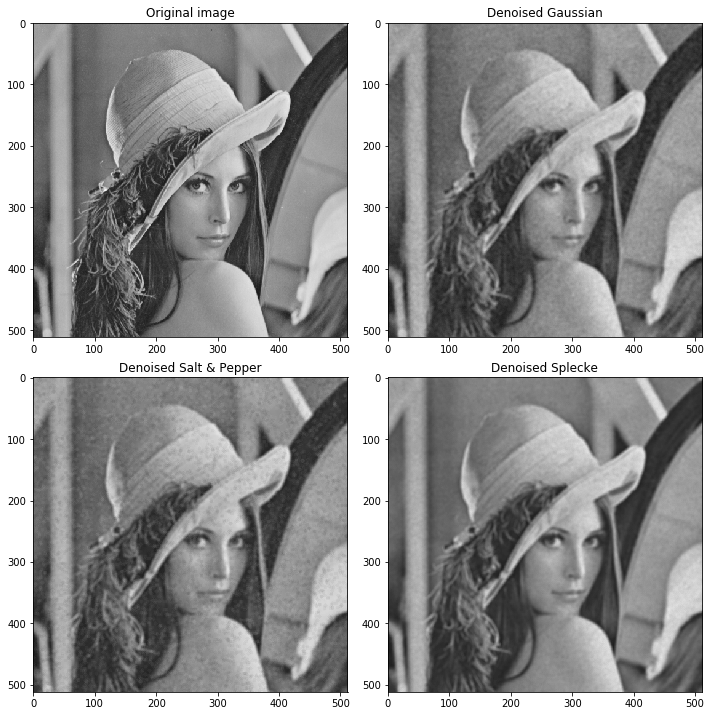

In [126]:
# Mean Filtering for disk radius=1
mean_lena_gaussian_1 = filters.rank.mean(lena_gaussian, disk(3))
mean_lena_snp_1 = filters.rank.mean(lena_saltnpepper, disk(3))
mean_lena_speckle_1 = filters.rank.mean(lena_speckle, disk(3))

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (221), io.imshow(lena_img), plt.title('Original image')
plt.subplot (222), io.imshow(mean_lena_gaussian_1), plt.title('Denoised Gaussian')
plt.subplot (223), io.imshow(mean_lena_snp_1), plt.title('Denoised Salt & Pepper')
plt.subplot (224), io.imshow(mean_lena_speckle_1), plt.title('Denoised Splecke')

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x2731a0458d0>,
 Text(0.5,1,'Denoised Splecke'))

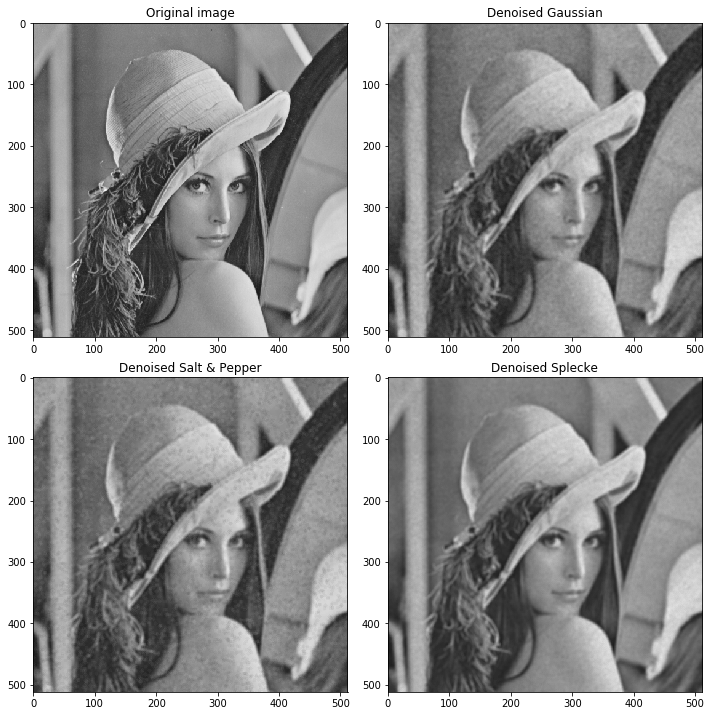

In [127]:
# Mean Filtering for disk radius=3
mean_lena_gaussian_3 = filters.rank.mean(lena_gaussian, disk(3))
mean_lena_snp_3 = filters.rank.mean(lena_saltnpepper, disk(3))
mean_lena_speckle_3 = filters.rank.mean(lena_speckle, disk(3))

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (221), io.imshow(lena_img), plt.title('Original image')
plt.subplot (222), io.imshow(mean_lena_gaussian_3), plt.title('Denoised Gaussian')
plt.subplot (223), io.imshow(mean_lena_snp_3), plt.title('Denoised Salt & Pepper')
plt.subplot (224), io.imshow(mean_lena_speckle_3), plt.title('Denoised Splecke')

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x2731c6cf3c8>,
 Text(0.5,1,'Denoised splecke'))

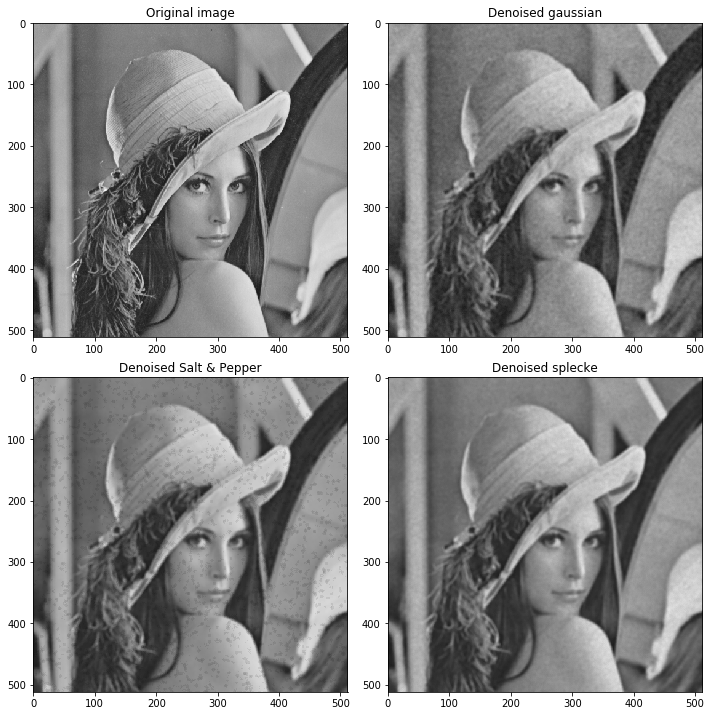

In [128]:
# Alpha Trimmed Mean Filtering
alpha_lena_gaussian= filters.rank.mean_percentile(lena_gaussian, disk(3), p0=0.05, p1=0.95)
alpha_lena_saltnpepper = filters.rank.mean_percentile(lena_saltnpepper, disk(3), p0=0.05, p1=0.95)
alpha_lena_speckle = filters.rank.mean_percentile(lena_speckle, disk(3), p0=0.05, p1=0.95)

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (221), io.imshow(lena_img), plt.title('Original image')
plt.subplot (222), io.imshow(alpha_lena_gaussian), plt.title('Denoised gaussian')
plt.subplot (223), io.imshow(alpha_lena_saltnpepper), plt.title('Denoised Salt & Pepper')
plt.subplot (224), io.imshow(alpha_lena_speckle), plt.title('Denoised splecke')


** Q.7.3 median filter: **

C:\Users\DoN\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x2731f2f50f0>,
 Text(0.5,1,'Denoised splecke'))

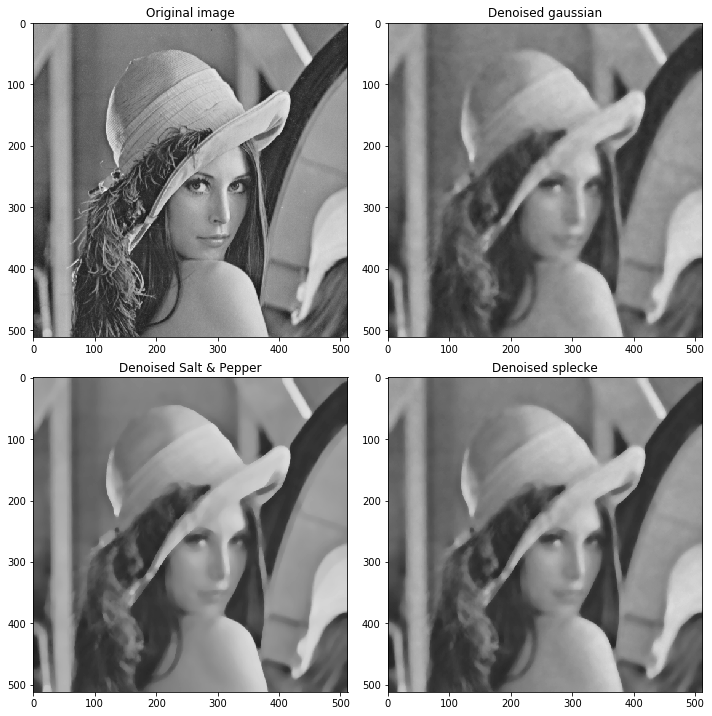

In [129]:
# Median Filtering
median_lena_gaussian= filters.rank.median(lena_gaussian, disk(7))
median_lena_saltnpepper = filters.rank.median(lena_saltnpepper, disk(7))
median_lena_speckle = filters.rank.median(lena_speckle, disk(7))

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (221), io.imshow(lena_img), plt.title('Original image')
plt.subplot (222), io.imshow(median_lena_gaussian), plt.title('Denoised gaussian')
plt.subplot (223), io.imshow(median_lena_saltnpepper), plt.title('Denoised Salt & Pepper')
plt.subplot (224), io.imshow(median_lena_speckle), plt.title('Denoised splecke')

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

(<matplotlib.axes._subplots.AxesSubplot at 0x2731c8122e8>,
 Text(0.5,1,'Filtered image using Laplace'))

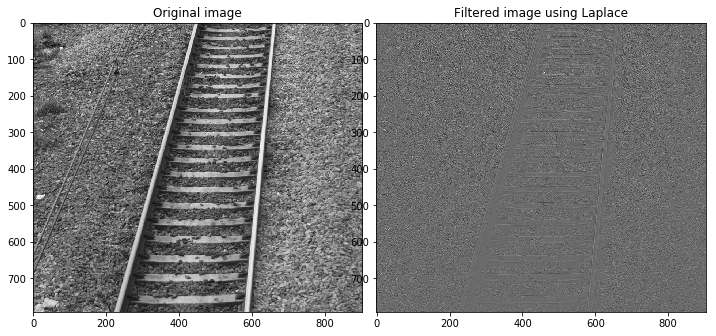

In [130]:
railway_img = io.imread('./images/railway.jpg', as_grey=True)
# Laplacian filter
railway_laplace = filters.laplace(railway_img)

# Display the Images
fig = plt.figure(figsize=(10,10))

plt.subplot (121), io.imshow(railway_img), plt.title('Original image')
plt.subplot (122), plt.imshow(railway_laplace, cmap='gray'), plt.title ('Filtered image using Laplace')

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**

In [131]:
from skimage.transform import hough_line
from skimage.transform import hough_line_peaks

from skimage.transform import probabilistic_hough_line
                               
from skimage.draw import line
from skimage.feature import canny

def hough_trans(img):
    
    edges = canny(img)
    
   
    out, angles, d = hough_line(edges)

    fix, axes = plt.subplots(1, 3, figsize=(10, 5))

    axes[0].imshow(img, cmap=plt.cm.gray)
    axes[0].set_title('Input image')
    
    axes[1].imshow(edges, cmap=plt.cm.gray)
    axes[1].set_title('Canny Edge Detection')

    axes[2].imshow(out, cmap=plt.cm.bone,
    extent=(np.rad2deg(angles[0]), np.rad2deg(angles[1]), d[0], d[1]) ) 
    
    axes[2].set_title('Hough transform')
    axes[2].set_xlabel('Angle (Degree)')
    axes[2].set_ylabel('Distance (Pixel)')

    plt.tight_layout()
    plt.show()
    

In [132]:
def hough_prob(img):
    
    edges = canny(img)
    lines = probabilistic_hough_line(edges, threshold=10, line_length=5, line_gap=3)

    fig, axes = plt.subplots(1, 3, figsize=(10,4))
    ax = axes.ravel()

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')

    ax[1].imshow(edges, cmap=plt.cm.gray)
    ax[1].set_title('Canny Edge Detection')

    ax[2].imshow(edges * 0 , cmap=plt.cm.gray)
  
    for line in lines:
        
        p0, p1 = line
        #print line
        ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))

    ax[2].set_title('Probabilistic Hough Line')
    ax[2].axis('image')
   

    plt.tight_layout()
    plt.show()

In [133]:
railway_img = io.imread('./images/railway.jpg', as_grey=True)
building_img = io.imread('./images/building.jpg', as_grey=True)

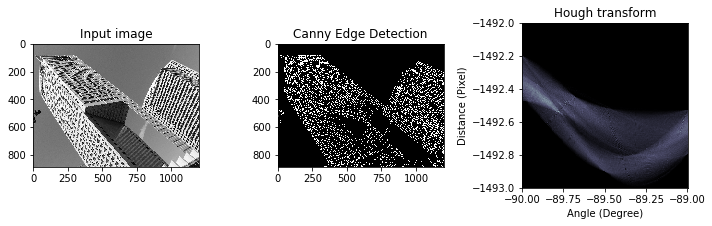

In [134]:
hough_trans(building_img)

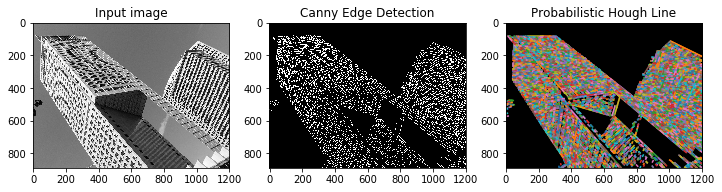

In [138]:
hough_prob(building_img)

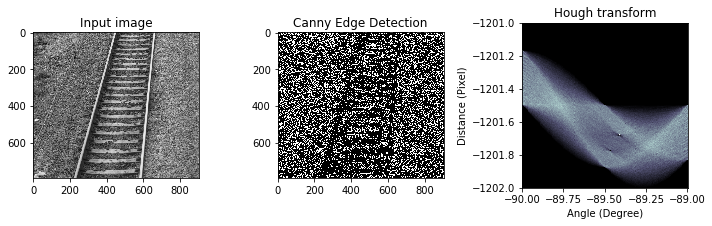

In [139]:
hough_trans(railway_img)

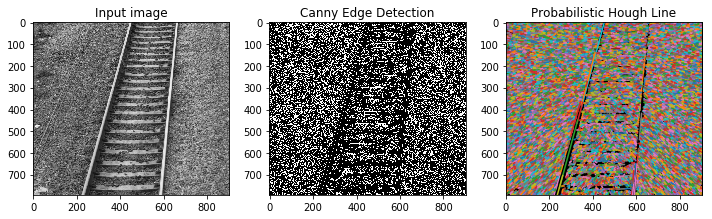

In [140]:
hough_prob(railway_img)